<a href="https://colab.research.google.com/github/reyhansyah23/pokemon-api-eda-etl/blob/main/pokemon_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch Data from Pokémon API

**Import libraries**

In [ ]:
import pandas as pd
import requests

pd.set_option('display.max_columns', 100) # to show all columns from dataframe (100 columns)

**get data from API**

In [ ]:
api = requests.get('https://pokeapi.co/api/v2/pokemon-species')
result = api.json()

In [ ]:
api.status_code

200

**print count of result to know how much pokemon-species data from API**

In [ ]:
print(result['count'])

1010


**see example from one species and store to dataframe**

In [ ]:
api_100 = requests.get('https://pokeapi.co/api/v2/pokemon-species/100')
result_100 = api_100.json()

In [ ]:
pd.json_normalize(result_100)

,base_happiness,capture_rate,egg_groups,evolves_from_species,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,id,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url
0,70,190,"[{'name': 'mineral', 'url': 'https://pokeapi.c...",None,[{'flavor_text': 'Usually found in power plant...,[],False,-1,"[{'genus': 'ボールポケモン', 'language': {'name': 'ja...",False,20,100,False,False,False,voltorb,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",109,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 100, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'vol...",red,https://pokeapi.co/api/v2/pokemon-color/8/,https://pokeapi.co/api/v2/evolution-chain/44/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium,https://pokeapi.co/api/v2/growth-rate/2/,urban,https://pokeapi.co/api/v2/pokemon-habitat/8/,ball,https://pokeapi.co/api/v2/pokemon-shape/1/


**make a loop to make a dataframe from all species based on count (1010 data)**

In [ ]:
# I use tqdm library to show the progress from the loop
from tqdm import tqdm

In [ ]:
species_count = result['count'] # Get total number of data in Pokémon API

pokemon_species_df = pd.DataFrame() # Make a new empty DataFrame

for species_id in tqdm(range(1, result['count']+1)):  # IDs range from 1 to species_count (max ID)
    api_url = f'https://pokeapi.co/api/v2/pokemon-species/{species_id}'
    api_response = requests.get(api_url)

    if api_response.status_code == 200:
        species_data = api_response.json()
        df = pd.json_normalize(species_data)
        pokemon_species_df = pd.concat([pokemon_species_df, df])
    else:
        print(f"Failed to retrieve data for species ID {species_id}")

100%|██████████| 1010/1010 [09:12<00:00,  1.83it/s]


**backup and read backup data**

In [ ]:
# Make a backup in new dataframe just in case there is a mistake when processing the dataframe
pokemon_species_df_backup = pokemon_species_df.copy()

In [ ]:
# Make a backup in csv
pokemon_species_df_backup.to_csv("pokemon.csv")

In [ ]:
# Read data from backup (csv)
pokemon_species_df = pd.read_csv("pokemon.csv")

**little exploration data**

In [ ]:
pokemon_species_df.set_index('id',inplace=True) # Set df ID from "id" column

In [ ]:
# Show dataframe result sample
pokemon_species_df.sample(3)

,base_happiness,capture_rate,egg_groups,evolves_from_species,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url,habitat,shape
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
451,50,120,"[{'name': 'bug', 'url': 'https://pokeapi.co/ap...",None,[{'flavor_text': 'It grips prey with its tail ...,[],False,4,"[{'genus': 'さそりポケモン', 'language': {'name': 'ja...",False,20,False,False,False,skorupi,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",471,"[{'area': {'name': 'sea', 'url': 'https://poke...","[{'entry_number': 451, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'sko...",purple,https://pokeapi.co/api/v2/pokemon-color/7/,https://pokeapi.co/api/v2/evolution-chain/234/,generation-iv,https://pokeapi.co/api/v2/generation/4/,slow,https://pokeapi.co/api/v2/growth-rate/1/,NaN,NaN,armor,https://pokeapi.co/api/v2/pokemon-shape/14/,NaN,NaN,NaN,NaN
173,140,150,"[{'name': 'no-eggs', 'url': 'https://pokeapi.c...",None,"[{'flavor_text': 'Because of its unusual, star...",[],False,6,"[{'genus': 'ほしがたポケモン', 'language': {'name': 'j...",False,10,True,False,False,cleffa,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",36,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 173, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'cle...",pink,https://pokeapi.co/api/v2/pokemon-color/6/,https://pokeapi.co/api/v2/evolution-chain/14/,generation-ii,https://pokeapi.co/api/v2/generation/2/,fast,https://pokeapi.co/api/v2/growth-rate/3/,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,NaN,NaN,NaN,NaN
823,50,45,"[{'name': 'flying', 'url': 'https://pokeapi.co...",None,[{'flavor_text': 'ガラルちほうの そらでは てきなし。 くろびかりする は...,[],False,4,"[{'genus': 'カラスポケモン', 'language': {'name': 'ja...",False,15,False,False,False,corviknight,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",823,[],"[{'entry_number': 823, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'cor...",purple,https://pokeapi.co/api/v2/pokemon-color/7/,https://pokeapi.co/api/v2/evolution-chain/434/,generation-viii,https://pokeapi.co/api/v2/generation/8/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,NaN,NaN,wings,https://pokeapi.co/api/v2/pokemon-shape/9/,corvisquire,https://pokeapi.co/api/v2/pokemon-species/822/,NaN,NaN


In [ ]:
min_id = pokemon_species_df.index.min()
max_id = pokemon_species_df.index.max()

print(f"This pokemon_species_df dataframe contains all pokemon species from id {min_id} to {max_id}")
print(f"\ndataframe length: {len(pokemon_species_df)} rows")

This pokemon_species_df dataframe contains all pokemon species from id 1 to 1010

dataframe length: 1010 rows


## Data exploration

In [ ]:
pokemon_species_df.head(1)

,base_happiness,capture_rate,egg_groups,evolves_from_species,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url,habitat,shape
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",None,[{'flavor_text': 'A strange seed was planted o...,[],False,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",False,20,False,False,False,bulbasaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",1,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 1, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'bul...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,NaN,NaN,NaN,NaN


### Identifying and listing the top 10 Pokémon that have the highest base happiness value

In [ ]:
# Show all total data count from base_happiness column sort by highest base_happiness to lowest
group_by = pokemon_species_df.groupby("base_happiness").agg(count=("base_happiness","count"))

group_by.sort_values("base_happiness",ascending=False)

,count
base_happiness,
140,11
100,15
90,5
70,217
50,608
35,73
20,3
0,71


In [ ]:
count_max_base_happiness = group_by.loc[group_by.index.max(), "count"]

print(f"From the dataframe, there is {count_max_base_happiness} Pokémon which have the highest base_happiness value. Here is the top 10:\n")

display(pokemon_species_df.sort_values("base_happiness",ascending=False).head(10))

From the dataframe, there is 11 Pokémon which have the highest base_happiness value. Here is the top 10:



,base_happiness,capture_rate,egg_groups,evolves_from_species,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url,habitat,shape
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
242,140,30,"[{'name': 'fairy', 'url': 'https://pokeapi.co/...",None,[{'flavor_text': 'Anyone who takes even one bi...,[],False,8,"[{'genus': 'しあわせポケモン', 'language': {'name': 'j...",False,40,False,False,False,blissey,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",128,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 242, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'bli...",pink,https://pokeapi.co/api/v2/pokemon-color/6/,https://pokeapi.co/api/v2/evolution-chain/51/,generation-ii,https://pokeapi.co/api/v2/generation/2/,fast,https://pokeapi.co/api/v2/growth-rate/3/,urban,https://pokeapi.co/api/v2/pokemon-habitat/8/,humanoid,https://pokeapi.co/api/v2/pokemon-shape/12/,chansey,https://pokeapi.co/api/v2/pokemon-species/113/,NaN,NaN
876,140,30,"[{'name': 'fairy', 'url': 'https://pokeapi.co/...",None,[{'flavor_text': 'あたまの ツノで あいての きもちを かんじとる。 オス...,[],False,4,"[{'genus': 'かんじょうポケモン', 'language': {'name': '...",False,40,False,False,False,indeedee,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",876,[],"[{'entry_number': 876, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'ind...",purple,https://pokeapi.co/api/v2/pokemon-color/7/,https://pokeapi.co/api/v2/evolution-chain/458/,generation-viii,https://pokeapi.co/api/v2/generation/8/,fast,https://pokeapi.co/api/v2/growth-rate/3/,NaN,NaN,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,NaN,NaN,NaN,NaN
113,140,30,"[{'name': 'fairy', 'url': 'https://pokeapi.co/...",None,[{'flavor_text': 'A rare and elusive POKéMON t...,[],False,8,"[{'genus': 'たまごポケモン', 'language': {'name': 'ja...",False,40,False,False,False,chansey,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",127,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 113, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'cha...",pink,https://pokeapi.co/api/v2/pokemon-color/6/,https://pokeapi.co/api/v2/evolution-chain/51/,generation-i,https://pokeapi.co/api/v2/generation/1/,fast,https://pokeapi.co/api/v2/growth-rate/3/,urban,https://pokeapi.co/api/v2/pokemon-habitat/8/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,happiny,https://pokeapi.co/api/v2/pokemon-species/440/,NaN,NaN
35,140,150,"[{'name': 'fairy', 'url': 'https://pokeapi.co/...",None,[{'flavor_text': 'Its magical and cute appeal ...,[],False,6,"[{'genus': 'ようせいポケモン', 'language': {'name': 'j...",False,10,False,False,False,clefairy,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",37,"[{'area': {'name': 'mountain', 'url': 'https:/...","[{'entry_number': 35, 'pokedex': {'name': 'nat...","[{'is_default': True, 'pokemon': {'name': 'cle...",pink,https://pokeapi.co/api/v2/pokemon-color/6/,https://pokeapi.co/api/v2/evolution-chain/14/,generation-i,https://pokeapi.co/api/v2/generation/1/,fast,https://pokeapi.co/api/v2/growth-rate/3/,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,cleffa,https://pokeapi.co/api/v2/pokemon-species/173/,NaN,NaN
482,140,3,"[{'name': 'no-eggs', 'url': 'https://pokeapi.c...",None,[{'flavor_text': 'Known as “The Being of Willp...,[],False,-1,"[{'genus': 'いしポケモン', 'language': {'name': 'ja-...",False,80,False,True,False,azelf,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",483,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 482, 'pokedex': {'name': 'na...","[{'is_default': True, 'pokemon': {'name': 'aze...",blue,https://pokeapi.co/api/v2/pokem

### Minimizing the number of column with analysis

In [ ]:
# Show all columns in Pokémon species dataframe
pokemon_species_df.columns

Index(['base_happiness', 'capture_rate', 'egg_groups', 'evolves_from_species',
       'flavor_text_entries', 'form_descriptions', 'forms_switchable',
       'gender_rate', 'genera', 'has_gender_differences', 'hatch_counter',
       'is_baby', 'is_legendary', 'is_mythical', 'name', 'names', 'order',
       'pal_park_encounters', 'pokedex_numbers', 'varieties', 'color.name',
       'color.url', 'evolution_chain.url', 'generation.name', 'generation.url',
       'growth_rate.name', 'growth_rate.url', 'habitat.name', 'habitat.url',
       'shape.name', 'shape.url', 'evolves_from_species.name',
       'evolves_from_species.url', 'habitat', 'shape'],
      dtype='object')

In [ ]:
# Show all columns in Pokémon species dataframe that contains Null values
has_null_data = pokemon_species_df.columns[pokemon_species_df.isna().any()]
print(has_null_data)

Index(['base_happiness', 'evolves_from_species', 'hatch_counter',
       'habitat.name', 'habitat.url', 'shape.name', 'shape.url',
       'evolves_from_species.name', 'evolves_from_species.url', 'habitat',
       'shape'],
      dtype='object')


In [ ]:
total_null = pokemon_species_df[has_null_data].isna().sum()
print(total_null)

base_happiness                  7
evolves_from_species         1010
hatch_counter                   7
habitat.name                  624
habitat.url                   624
shape.name                    105
shape.url                     105
evolves_from_species.name     530
evolves_from_species.url      530
habitat                      1010
shape                        1010
dtype: int64


In [ ]:
column_with_null_less_than_1010 = total_null[total_null.values<1010]
print(column_with_null_less_than_1010)

base_happiness                 7
hatch_counter                  7
habitat.name                 624
habitat.url                  624
shape.name                   105
shape.url                    105
evolves_from_species.name    530
evolves_from_species.url     530
dtype: int64


In [ ]:
df_with_null_less_than_1010 = pokemon_species_df[column_with_null_less_than_1010.index]
df_with_null_less_than_1010

,base_happiness,hatch_counter,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url
id,,,,,,,,
1,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,NaN,NaN
2,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,bulbasaur,https://pokeapi.co/api/v2/pokemon-species/1/
3,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,ivysaur,https://pokeapi.co/api/v2/pokemon-species/2/
4,50,20,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,NaN,NaN
5,50,20,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,charmander,https://pokeapi.co/api/v2/pokemon-species/4/
...,...,...,...,...,...,...,...,...
1006,0,50,NaN,NaN,NaN,NaN,NaN,NaN
1007,0,50,NaN,NaN,NaN,NaN,NaN,NaN
1008,0,50,NaN,NaN,NaN,NaN,NaN,NaN


***from all the information above, I will eliminate some columns step-by-step with explanation below***

***1st:***
**eliminate columns that all the value is null**

I will eliminate all columns that contains null value in all rows because it will give 0 impact to the data

In [ ]:
total_data = len(pokemon_species_df)
print(f"Total data: {total_data}\n")

# Show columns which all values is null
column_with_all_null = total_null[total_null.values == total_data]
print("Columns which all values is null: ")
print(column_with_all_null)

Total data: 1010

Columns which all values is null: 
evolves_from_species    1010
habitat                 1010
shape                   1010
dtype: int64


In [ ]:
# Show dataframe before columns drop
pokemon_species_df.head(1)

,base_happiness,capture_rate,egg_groups,evolves_from_species,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url,habitat,shape
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",None,[{'flavor_text': 'A strange seed was planted o...,[],False,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",False,20,False,False,False,bulbasaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",1,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 1, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'bul...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,NaN,NaN,NaN,NaN


In [ ]:
# Drop 3 columns that contain null values in all row and store to new dataframe
pokemon_species_df_1 = pokemon_species_df.drop(columns=column_with_all_null.index)

In [ ]:
# Show first 3 data after columns drop
pokemon_species_df_1.head(3)

,base_happiness,capture_rate,egg_groups,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",[{'flavor_text': 'A strange seed was planted o...,[],False,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",False,20,False,False,False,bulbasaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",1,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 1, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'bul...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,NaN,NaN
2,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",[{'flavor_text': 'When the bulb on its back gr...,[],False,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",False,20,False,False,False,ivysaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",2,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 2, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'ivy...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,bulbasaur,https://pokeapi.co/api/v2/pokemon-species/1/
3,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",[{'flavor_text': 'The plant blooms when it is ...,[],True,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",True,20,False,False,False,venusaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",3,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 3, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'ven...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,ivysaur,https://pokeapi.co/api/v2/pokemon-species/2/


***2nd:***
**analyze columns with some null data**

In [ ]:
df_with_null_less_than_1010.reset_index(inplace=True)
df_with_null_less_than_1010

,id,base_happiness,hatch_counter,habitat.name,habitat.url,shape.name,shape.url,evolves_from_species.name,evolves_from_species.url
0,1,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,NaN,NaN
1,2,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,bulbasaur,https://pokeapi.co/api/v2/pokemon-species/1/
2,3,50,20,grassland,https://pokeapi.co/api/v2/pokemon-habitat/3/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/,ivysaur,https://pokeapi.co/api/v2/pokemon-species/2/
3,4,50,20,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,NaN,NaN
4,5,50,20,mountain,https://pokeapi.co/api/v2/pokemon-habitat/4/,upright,https://pokeapi.co/api/v2/pokemon-shape/6/,charmander,https://pokeapi.co/api/v2/pokemon-species/4/
...,...,...,...,...,...,...,...,...,...
1005,1006,0,50,NaN,NaN,NaN,NaN,NaN,NaN
1006,1007,0,50,NaN,NaN,NaN,NaN,NaN,NaN
1007,1008,0,50,NaN,NaN,NaN,NaN,NaN,NaN
1008,1009,0,50,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display all columns that contain null value and aggregate by each value
for col in df_with_null_less_than_1010.columns:
    if (col == "id"): # skip the "id" column
        pass
    else:
        grouped = df_with_null_less_than_1010.groupby(col, dropna=False).agg({"id":"count"})
        grouped = grouped.rename({"id":"count"}, axis=1)

        grouped["percentage"] = (grouped["count"].values / grouped["count"].sum() * 100).round(2)
        grouped["percentage"] = grouped["percentage"].apply(lambda x: f"{x:.2f}%")
        print(f"Column's name: {col}")
        display(grouped)

Column's name: base_happiness


,count,percentage
base_happiness,,
0.0,71,7.03%
35.0,73,7.23%
50.0,608,60.20%
70.0,217,21.49%
90.0,5,0.50%
100.0,15,1.49%
140.0,11,1.09%
NaN,7,0.69%
20.0,3,0.30%


Column's name: hatch_counter


,count,percentage
hatch_counter,,
5.0,2,0.20%
10.0,25,2.48%
15.0,162,16.04%
20.0,532,52.67%
25.0,68,6.73%
30.0,30,2.97%
35.0,24,2.38%
40.0,52,5.15%
80.0,16,1.58%


Column's name: habitat.name


,count,percentage
habitat.name,,
cave,29,2.87%
forest,71,7.03%
grassland,80,7.92%
mountain,45,4.46%
rare,10,0.99%
rough-terrain,27,2.67%
sea,40,3.96%
urban,37,3.66%
waters-edge,47,4.65%


Column's name: habitat.url


,count,percentage
habitat.url,,
https://pokeapi.co/api/v2/pokemon-habitat/1/,29,2.87%
https://pokeapi.co/api/v2/pokemon-habitat/2/,71,7.03%
https://pokeapi.co/api/v2/pokemon-habitat/3/,80,7.92%
https://pokeapi.co/api/v2/pokemon-habitat/4/,45,4.46%
https://pokeapi.co/api/v2/pokemon-habitat/5/,10,0.99%
https://pokeapi.co/api/v2/pokemon-habitat/6/,27,2.67%
https://pokeapi.co/api/v2/pokemon-habitat/7/,40,3.96%
https://pokeapi.co/api/v2/pokemon-habitat/8/,37,3.66%
https://pokeapi.co/api/v2/pokemon-habitat/9/,47,4.65%


Column's name: shape.name


,count,percentage
shape.name,,
armor,40,3.96%
arms,48,4.75%
ball,42,4.16%
blob,38,3.76%
bug-wings,21,2.08%
fish,41,4.06%
heads,16,1.58%
humanoid,137,13.56%
legs,23,2.28%


Column's name: shape.url


,count,percentage
shape.url,,
https://pokeapi.co/api/v2/pokemon-shape/1/,42,4.16%
https://pokeapi.co/api/v2/pokemon-shape/10/,23,2.28%
https://pokeapi.co/api/v2/pokemon-shape/11/,16,1.58%
https://pokeapi.co/api/v2/pokemon-shape/12/,137,13.56%
https://pokeapi.co/api/v2/pokemon-shape/13/,21,2.08%
https://pokeapi.co/api/v2/pokemon-shape/14/,40,3.96%
https://pokeapi.co/api/v2/pokemon-shape/2/,37,3.66%
https://pokeapi.co/api/v2/pokemon-shape/3/,41,4.06%
https://pokeapi.co/api/v2/pokemon-shape/4/,48,4.75%


Column's name: evolves_from_species.name


,count,percentage
evolves_from_species.name,,
abra,1,0.10%
aipom,1,0.10%
amaura,1,0.10%
anorith,1,0.10%
applin,2,0.20%
...,...,...
zigzagoon,1,0.10%
zorua,1,0.10%
zubat,1,0.10%


Column's name: evolves_from_species.url


,count,percentage
evolves_from_species.url,,
https://pokeapi.co/api/v2/pokemon-species/1/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/10/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/100/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/102/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/104/,1,0.10%
...,...,...
https://pokeapi.co/api/v2/pokemon-species/98/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/996/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/997/,1,0.10%


From all the columns that have a null values above, there are multiple columns that have a null values more than 50% from its total value

So, in this code below I will show all the columns that have null values more than 50%, and will eliminate that column, because in my opinion if the column has more than 50% null value, it will give less meaningful information to the dataset

In [ ]:
# Display all columns that contain null value more than 50%
col_name_null = []

for col in df_with_null_less_than_1010.columns:
    if (col == "id"): # skip the "id" column
        pass
    else:
        grouped = df_with_null_less_than_1010.groupby(col, dropna=False).agg({"id":"count"})
        grouped = grouped.rename({"id":"count"}, axis=1)

        grouped["percentage"] = grouped["count"].values / grouped["count"].sum()

        if grouped.loc[(grouped.index.isna())]["percentage"].values >= 0.5:
            col_name_null.append(col)

            grouped["percentage"] = grouped["percentage"] * 100
            grouped["percentage"] = grouped["percentage"].apply(lambda x: f"{x:.2f}%")
            print(f"Column's name: {col}")
            display(grouped)

print(f"From dataframe above, columns {col_name_null} are the columns that have more than 50% null values")

Column's name: habitat.name


,count,percentage
habitat.name,,
cave,29,2.87%
forest,71,7.03%
grassland,80,7.92%
mountain,45,4.46%
rare,10,0.99%
rough-terrain,27,2.67%
sea,40,3.96%
urban,37,3.66%
waters-edge,47,4.65%


Column's name: habitat.url


,count,percentage
habitat.url,,
https://pokeapi.co/api/v2/pokemon-habitat/1/,29,2.87%
https://pokeapi.co/api/v2/pokemon-habitat/2/,71,7.03%
https://pokeapi.co/api/v2/pokemon-habitat/3/,80,7.92%
https://pokeapi.co/api/v2/pokemon-habitat/4/,45,4.46%
https://pokeapi.co/api/v2/pokemon-habitat/5/,10,0.99%
https://pokeapi.co/api/v2/pokemon-habitat/6/,27,2.67%
https://pokeapi.co/api/v2/pokemon-habitat/7/,40,3.96%
https://pokeapi.co/api/v2/pokemon-habitat/8/,37,3.66%
https://pokeapi.co/api/v2/pokemon-habitat/9/,47,4.65%


Column's name: evolves_from_species.name


,count,percentage
evolves_from_species.name,,
abra,1,0.10%
aipom,1,0.10%
amaura,1,0.10%
anorith,1,0.10%
applin,2,0.20%
...,...,...
zigzagoon,1,0.10%
zorua,1,0.10%
zubat,1,0.10%


Column's name: evolves_from_species.url


,count,percentage
evolves_from_species.url,,
https://pokeapi.co/api/v2/pokemon-species/1/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/10/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/100/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/102/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/104/,1,0.10%
...,...,...
https://pokeapi.co/api/v2/pokemon-species/98/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/996/,1,0.10%
https://pokeapi.co/api/v2/pokemon-species/997/,1,0.10%


From dataframe above, columns ['habitat.name', 'habitat.url', 'evolves_from_species.name', 'evolves_from_species.url'] are the columns that have more than 50% null values


In [ ]:
# Drop columns from that have more than 50% null values
pokemon_species_df_2 = pokemon_species_df_1.drop(columns= col_name_null)
pokemon_species_df_2.head(1)

,base_happiness,capture_rate,egg_groups,flavor_text_entries,form_descriptions,forms_switchable,gender_rate,genera,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,names,order,pal_park_encounters,pokedex_numbers,varieties,color.name,color.url,evolution_chain.url,generation.name,generation.url,growth_rate.name,growth_rate.url,shape.name,shape.url
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,50,45,"[{'name': 'monster', 'url': 'https://pokeapi.c...",[{'flavor_text': 'A strange seed was planted o...,[],False,1,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...",False,20,False,False,False,bulbasaur,"[{'language': {'name': 'ja-Hrkt', 'url': 'http...",1,"[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 1, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'bul...",green,https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,generation-i,https://pokeapi.co/api/v2/generation/1/,medium-slow,https://pokeapi.co/api/v2/growth-rate/4/,quadruped,https://pokeapi.co/api/v2/pokemon-shape/8/


***3rd:***
**drop columns that contains JSON object and url**

*if we want to analyze the data more advance (create a new dataframe from JSON object or the API url from those columns), better not dropping these column

In [ ]:
col_name_null = ['egg_groups', 'flavor_text_entries','genera','names', 'pal_park_encounters',
       'pokedex_numbers', 'varieties', 'color.url',
       'evolution_chain.url', 'generation.url', 'growth_rate.url', 'shape.url']

pokemon_species_df_2[col_name_null].head(1)

,egg_groups,flavor_text_entries,genera,names,pal_park_encounters,pokedex_numbers,varieties,color.url,evolution_chain.url,generation.url,growth_rate.url,shape.url
id,,,,,,,,,,,,
1,"[{'name': 'monster', 'url': 'https://pokeapi.c...",[{'flavor_text': 'A strange seed was planted o...,"[{'genus': 'たねポケモン', 'language': {'name': 'ja-...","[{'language': {'name': 'ja-Hrkt', 'url': 'http...","[{'area': {'name': 'field', 'url': 'https://po...","[{'entry_number': 1, 'pokedex': {'name': 'nati...","[{'is_default': True, 'pokemon': {'name': 'bul...",https://pokeapi.co/api/v2/pokemon-color/5/,https://pokeapi.co/api/v2/evolution-chain/1/,https://pokeapi.co/api/v2/generation/1/,https://pokeapi.co/api/v2/growth-rate/4/,https://pokeapi.co/api/v2/pokemon-shape/8/


In [ ]:
# Drop the columns and show the final dataframe
pokemon_species_df_3 = pokemon_species_df_2.drop(columns=col_name_null).reset_index()
pokemon_species_df_3.head(1)

,id,base_happiness,capture_rate,form_descriptions,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,order,color.name,generation.name,growth_rate.name,shape.name
0,1,50,45,[],False,1,False,20,False,False,False,bulbasaur,1,green,generation-i,medium-slow,quadruped


***4th:***
**analyze the most unique values**

In [ ]:
column_name = []
unique_value = []
value_name = []
count_value = []
percentage = []

temp_df = pokemon_species_df_3.astype(str) # Convert all columns to string

for col in temp_df.columns:
    if (col == "id"): # skip the "id" column
        pass
    else:
        unique_number = len(temp_df[col].unique())

        grouped = temp_df.groupby(col, dropna=False).agg({"id":"count"})
        grouped = grouped.rename({"id":"count"}, axis=1)
        grouped["percentage"] = (grouped["count"].values / grouped["count"].sum() * 100).round(2)

        value = grouped.loc[grouped["percentage"] == grouped["percentage"].max()].index[0]
        count = grouped.loc[grouped["percentage"] == grouped["percentage"].max()]["count"].values[0]
        perc = grouped.loc[grouped["percentage"] == grouped["percentage"].max()]["percentage"].values[0]

        column_name.append(col)
        unique_value.append(unique_number)
        value_name.append(value)
        count_value.append(count)
        percentage.append(perc)


unique_df = pd.DataFrame({"column":column_name,
                          "unique_number":unique_value,
                          "most_value_name":value_name,
                          "most_value_count":count_value,
                          "most_value_percentage":percentage})

display(unique_df)

,column,unique_number,most_value_name,most_value_count,most_value_percentage
0,base_happiness,9,50,608,60.20
1,capture_rate,38,45,312,30.89
2,form_descriptions,35,[],976,96.63
3,forms_switchable,2,False,939,92.97
4,gender_rate,8,4,626,61.98
5,has_gender_differences,2,False,911,90.20
6,hatch_counter,12,20,532,52.67
7,is_baby,2,False,991,98.12
8,is_legendary,2,False,945,93.56
9,is_mythical,2,False,988,97.82


In [ ]:
unique_df.sort_values("most_value_percentage",ascending=False)

,column,unique_number,most_value_name,most_value_count,most_value_percentage
7,is_baby,2,False,991,98.12
9,is_mythical,2,False,988,97.82
2,form_descriptions,35,[],976,96.63
8,is_legendary,2,False,945,93.56
3,forms_switchable,2,False,939,92.97
5,has_gender_differences,2,False,911,90.20
4,gender_rate,8,4,626,61.98
0,base_happiness,9,50,608,60.20
6,hatch_counter,12,20,532,52.67
14,growth_rate.name,6,medium,398,39.41


***from the data above, we can see there are 6 columns which have most_value more than 90%, but 5 of them are boolean value (True or False //it can be seen from the unique_number it only have 2 unique number)***

***So, the most highlighted from the data above is "form_descriptions" column because it has 35 unique value with the most appear value is "[]" (96.63% of total value)***

In [ ]:
# Show unique value from "form_descriptions"
pokemon_species_df_3["form_descriptions"].astype(str).unique()

array(['[]',
       '[{\'description\': "Spiky-eared Pichu can only be received by taking the shiny Pichu from an official promotion to celebi\'s shrine in ilex forest.  Spiky-eared Pichu is always female, cannot evolve, cannot be taken into the Wi-Fi Club or the Union Room, and cannot be transferred to Generation V, but is otherwise a normal Pichu.", \'language\': {\'name\': \'en\', \'url\': \'https://pokeapi.co/api/v2/language/9/\'}}]',
       "[{'description': 'Forms only affect appearance.  A form is determined at random before a wild encounter and cannot be changed.', 'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'}}]",
       "[{'description': 'Form changes along with type to match the weather in battle, due to forecast.  Castform is always in its normal form outside of battle, regardless of weather.', 'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'}}]",
       '[{\'description\': "Forms have different stats and can learn differ

***from the information above, i think the column should be remove because it has less meaningfull information to the data***

In [ ]:
pokemon_species_df_4 = pokemon_species_df_3.drop(columns="form_descriptions",axis=1)
pokemon_species_df_4.head(1)

,id,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,name,order,color.name,generation.name,growth_rate.name,shape.name
0,1,50,45,False,1,False,20,False,False,False,bulbasaur,1,green,generation-i,medium-slow,quadruped


***Final***

In [ ]:
# Make the "name" column as the first column

name_column = "name"

# Create a new DataFrame with the desired column in the front
new_column_order = [name_column] + [col for col in pokemon_species_df_4.columns if col != name_column]
pokemon_species_df_final = pokemon_species_df_4[new_column_order]
pokemon_species_df_final

,name,id,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,order,color.name,generation.name,growth_rate.name,shape.name
0,bulbasaur,1,50,45,False,1,False,20,False,False,False,1,green,generation-i,medium-slow,quadruped
1,ivysaur,2,50,45,False,1,False,20,False,False,False,2,green,generation-i,medium-slow,quadruped
2,venusaur,3,50,45,True,1,True,20,False,False,False,3,green,generation-i,medium-slow,quadruped
3,charmander,4,50,45,False,1,False,20,False,False,False,4,red,generation-i,medium-slow,upright
4,charmeleon,5,50,45,False,1,False,20,False,False,False,5,red,generation-i,medium-slow,upright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,iron-valiant,1006,0,10,False,-1,False,50,False,False,False,993,white,generation-ix,slow,NaN
1006,koraidon,1007,0,3,False,-1,False,50,False,True,False,998,red,generation-ix,slow,NaN
1007,miraidon,1008,0,3,False,-1,False,50,False,True,False,999,blue,generation-ix,slow,NaN
1008,walking-wake,1009,0,5,False,-1,False,50,False,False,False,1011,blue,generation-ix,slow,NaN


### Analyze the data correlation

**To see the correlation between columns in dataframe, column with data type object (string) should be change to numeric values first**

In [ ]:
# Show dataframe with object columns
pokemon_species_df_final.select_dtypes(include=['object'])

,name,base_happiness,hatch_counter,color.name,generation.name,growth_rate.name,shape.name
0,bulbasaur,50,20,green,generation-i,medium-slow,quadruped
1,ivysaur,50,20,green,generation-i,medium-slow,quadruped
2,venusaur,50,20,green,generation-i,medium-slow,quadruped
3,charmander,50,20,red,generation-i,medium-slow,upright
4,charmeleon,50,20,red,generation-i,medium-slow,upright
...,...,...,...,...,...,...,...
1005,iron-valiant,0,50,white,generation-ix,slow,NaN
1006,koraidon,0,50,red,generation-ix,slow,NaN
1007,miraidon,0,50,blue,generation-ix,slow,NaN
1008,walking-wake,0,50,blue,generation-ix,slow,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert object column to numeric using LabelEncoder
for col in pokemon_species_df_final.select_dtypes(include=['object']).columns:
    pokemon_species_df_final[col+"_cat"] = label_encoder.fit_transform(pokemon_species_df_final[col])

C:\Users\reyha\AppData\Local\Temp\ipykernel_25296\2843385427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_species_df_final[col+"_cat"] = label_encoder.fit_transform(pokemon_species_df_final[col])
C:\Users\reyha\AppData\Local\Temp\ipykernel_25296\2843385427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_species_df_final[col+"_cat"] = label_encoder.fit_transform(pokemon_species_df_final[col])
C:\Users\reyha\AppData\Local\Temp\ipykernel_25296\2843385427.py:8: SettingWithCopyWarning:

In [ ]:
# Show data with numeric and boolean datatype to see the correlation

pokemon_corr = pokemon_species_df_final.select_dtypes(include=['number', 'bool']).drop("id",axis=1).corr()
pokemon_corr

,capture_rate,forms_switchable,gender_rate,has_gender_differences,is_baby,is_legendary,is_mythical,order,name_cat,base_happiness_cat,hatch_counter_cat,color.name_cat,generation.name_cat,growth_rate.name_cat,shape.name_cat
capture_rate,1.000000,-0.178151,0.382958,0.010691,0.046646,-0.279182,-0.170119,-0.092214,0.076555,0.189518,-0.424197,-0.001692,-0.051280,-0.270989,-0.146580
forms_switchable,-0.178151,1.000000,-0.069070,0.078680,-0.038075,0.133061,0.144691,-0.112254,-0.096298,-0.019915,0.166210,0.001532,-0.118843,0.109514,-0.008576
gender_rate,0.382958,-0.069070,1.000000,0.124283,0.056247,-0.396831,-0.267485,-0.109750,-0.040855,0.356171,-0.501888,0.011854,-0.067491,-0.344763,-0.062153
has_gender_differences,0.010691,0.078680,0.124283,1.000000,-0.045646,-0.086457,-0.049192,-0.242669,0.015104,0.109230,-0.134251,-0.028550,-0.230589,-0.008064,0.018092
is_baby,0.046646,-0.038075,0.056247,-0.045646,1.000000,-0.036315,-0.020662,-0.133745,-0.000112,0.048096,-0.032945,0.023679,-0.073229,-0.114241,0.007385
is_legendary,-0.279182,0.133061,-0.396831,-0.086457,-0.036315,1.000000,-0.039136,0.117452,0.085032,-0.259189,0.561370,0.019430,0.085750,0.306020,0.024014
is_mythical,-0.170119,0.144691,-0.267485,-0.049192,-0.020662,-0.039136,1.000000,0.049996,0.005956,-0.035659,0.329995,0.040063,0.053638,0.156208,-0.066797
order,-0.092214,-0.112254,-0.109750,-0.242669,-0.133745,0.117452,0.049996,1.000000,-0.047517,-0.226643,0.239176,0.014627,0.845699,0.162574,0.209278
name_cat,0.076555,-0.096298,-0.040855,0.015104,-0.000112,0.085032,0.005956,-0.047517,1.000000,-0.014445,-0.011509,-0.032108,-0.032013,0.018885,0.028781
base_happiness_cat,0.189518,-0.019915,0.356171,0.109230,0.048096,-0.259189,-0.035659,-0.226643,-0.014445,1.000000,-0.346339,-0.004594,-0.110119,-0.299422,-0.128653


**Use the visualization to see correlation between column**

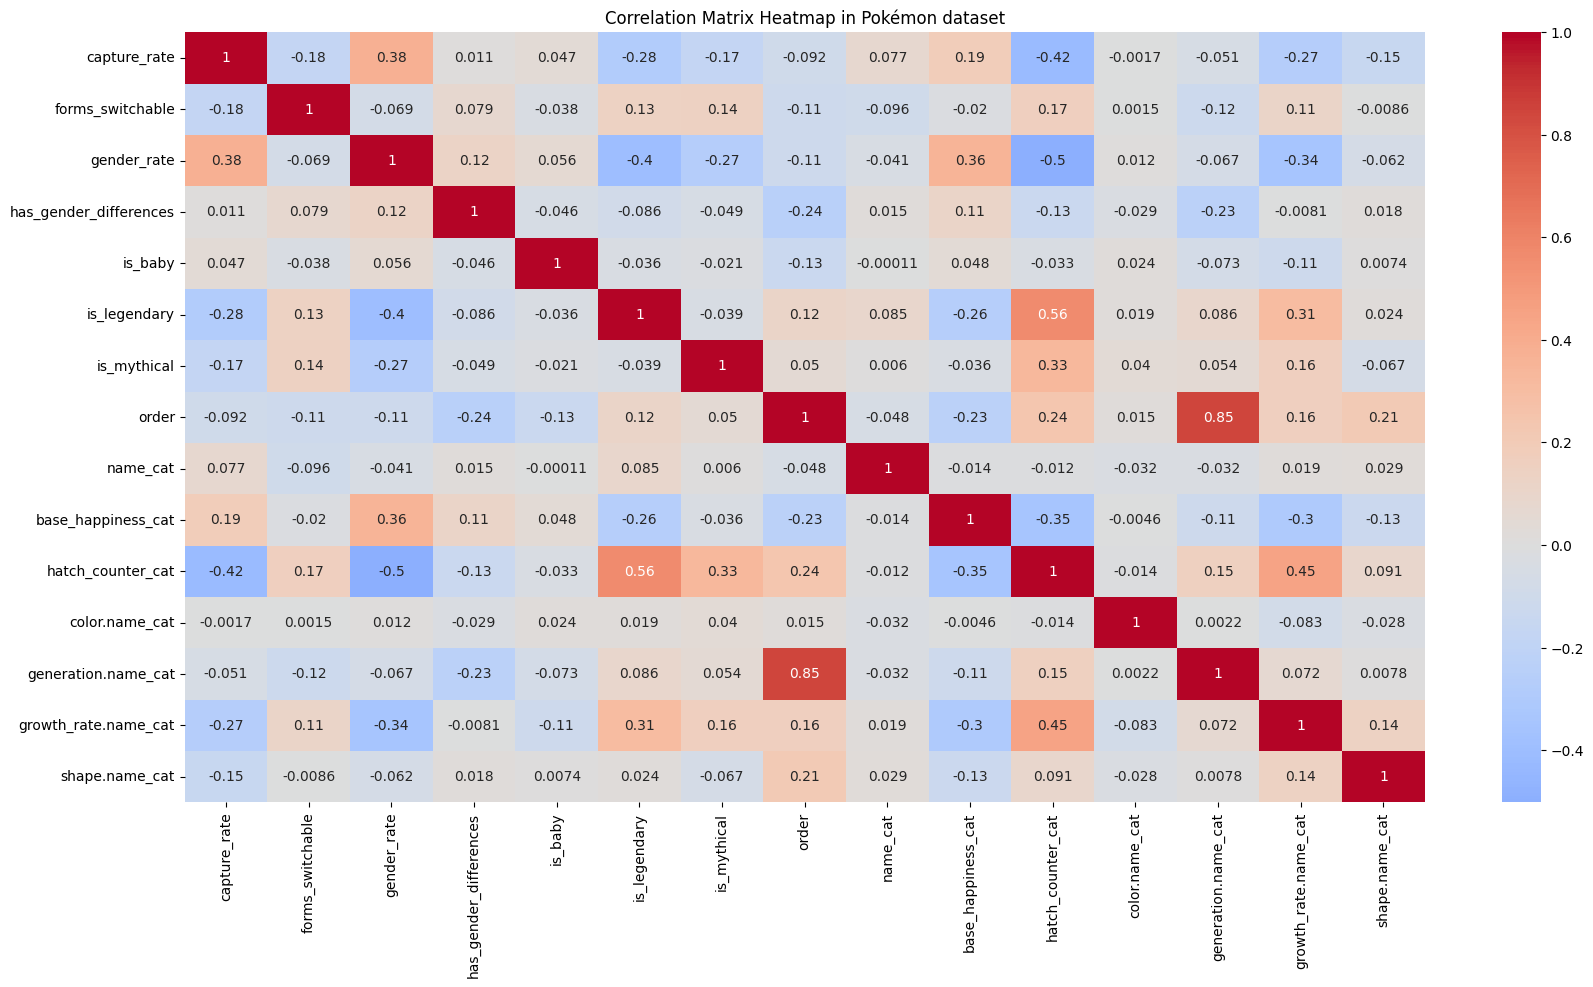

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
correlation_matrix = pokemon_corr

# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap in Pokémon dataset')
plt.show()

**from the visualization above, it can be seen that the highest correlation is between generation.name and order with 85% correlation**

In [ ]:
pokemon_species_df_final[["generation.name", "order"]]

,generation.name,order
0,generation-i,1
1,generation-i,2
2,generation-i,3
3,generation-i,4
4,generation-i,5
...,...,...
1005,generation-ix,993
1006,generation-ix,998
1007,generation-ix,999
1008,generation-ix,1011


### What if we want to create an ETL to get data from API to other database?

* DATA LOADING

***1st Step:***

**Do the Extract and Transform data (all the code above)**

***2nd Step:***

**Initiate the data to store in database for the first time (assuming that the data in db target is empty)**

*I use Big Query for example, but i can't run the code because it just an example code (I don't have the actual database)*

In [ ]:
# Dataframe final after doing the Transform above
pokemon_species_df_final

,name,id,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,order,color.name,generation.name,growth_rate.name,shape.name,name_cat,base_happiness_cat,hatch_counter_cat,color.name_cat,generation.name_cat,growth_rate.name_cat,shape.name_cat
0,bulbasaur,1,50,45,False,1,False,20,False,False,False,1,green,generation-i,medium-slow,quadruped,93,3,3,4,0,3,9
1,ivysaur,2,50,45,False,1,False,20,False,False,False,2,green,generation-i,medium-slow,quadruped,424,3,3,4,0,3,9
2,venusaur,3,50,45,True,1,True,20,False,False,False,3,green,generation-i,medium-slow,quadruped,941,3,3,4,0,3,9
3,charmander,4,50,45,False,1,False,20,False,False,False,4,red,generation-i,medium-slow,upright,123,3,3,7,0,3,12
4,charmeleon,5,50,45,False,1,False,20,False,False,False,5,red,generation-i,medium-slow,upright,124,3,3,7,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,iron-valiant,1006,0,10,False,-1,False,50,False,False,False,993,white,generation-ix,slow,NaN,423,0,8,8,4,4,14
1006,koraidon,1007,0,3,False,-1,False,50,False,True,False,998,red,generation-ix,slow,NaN,456,0,8,7,4,4,14
1007,miraidon,1008,0,3,False,-1,False,50,False,True,False,999,blue,generation-ix,slow,NaN,564,0,8,1,4,4,14
1008,walking-wake,1009,0,5,False,-1,False,50,False,False,False,1011,blue,generation-ix,slow,NaN,959,0,8,1,4,4,14


In [ ]:
# Set up credential for database in BigQuery

from google.oauth2 import service_account
from google.cloud import bigquery

credentials = service_account.Credentials.from_service_account_file("credential_project.json")
project_id = "project-name"
client = bigquery.Client(credentials=credentials, project=project_id)

In [ ]:
# Write the dataframe to the table

dataset = "pokemon"
table = "pokemon_species"

pandas_gbq.to_gbq(pokemon_species_df_final, destination_table=f"{project_id}.{dataset}.{table}",
                  project_id=project_id,if_exists="replace", # Use the replace argument because it is the initiate data, will replace all the data in table (if exist)
                  credentials=credentials,progress_bar=False)

***3rd Step:***

**Well actually we can use some mechanism for updating the data**

***3a;***

if we want to updating the data by replacing ALL the data, then just do until step 2

In the code above, we use "replace" in if_exist parameter when writing the dataframe to BigQuery, it makes all the data will replace everytime we run the code

***3b;***

if we want to updating the data just get the latest data without make any change in the initiate data

Pokémon

In [ ]:
# Read the data, get the id

import pandas_gbq
from google.oauth2 import service_account

query = """
select id from pokemon.pokemon_species
"""

pokemon_bq = pandas_gbq.read_gbq(query,project_id=project_id, credentials=credentials)

In [ ]:
# Get result data from API

api = requests.get('https://pokeapi.co/api/v2/pokemon-species')
result = api.json()

In [ ]:
id_list = pokemon_bq["id"].values # Get all id in pokemon dataframe from bigquery

species_count = result['count'] # Get total number of data in Pokémon API
pokemon_species_df = pd.DataFrame() # Make a new empty DataFrame

for species_id in tqdm(range(1, result['count']+1)):  # IDs range from 1 to species_count
    if species_id in id_list: # Checking if id is already in dataframe from bigquery, if exist then pass
        pass
    else:
        api_url = f'https://pokeapi.co/api/v2/pokemon-species/{species_id}'
        api_response = requests.get(api_url)

        if api_response.status_code == 200:
            species_data = api_response.json()
            df = pd.json_normalize(species_data)
            pokemon_species_df = pd.concat([pokemon_species_df, df])
        else:
            print(f"Failed to retrieve data for species ID {species_id}")

pokemon_species_df.set_index("id",inplace=True)

In [ ]:
# Append the dataframe to the existing table in BigQuery

dataset = "pokemon"
table = "pokemon_species"

pandas_gbq.to_gbq(pokemon_species_df_final, destination_table=f"{project_id}.{dataset}.{table}",
                  project_id=project_id,if_exists="append", # Use the append argument because it will add to the existing data
                  credentials=credentials,progress_bar=False)

***4th Step:***

**Run the script from section Data Retrieval (Extract, Transform) until Data Loading (Load) by using some scheduler tools like cronjob and set the time to run the script daily (ex. run every 00.00)**

**Done**

**Notes*

* make a column to add timestamp to show when the etl is made or data is modified before write to database to provide information when the data was last modified, example:

In [ ]:
from datetime import datetime, timezone

# add timestamp now in UTC
now = datetime.now(timezone.utc)

pokemon_species_df_final["etl_created"] = now
pokemon_species_df_final.head(1)

C:\Users\reyha\AppData\Local\Temp\ipykernel_25296\2927562755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_species_df_final["etl_created"] = now


,name,id,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_counter,is_baby,is_legendary,is_mythical,order,color.name,generation.name,growth_rate.name,shape.name,name_cat,color.name_cat,generation.name_cat,growth_rate.name_cat,shape.name_cat,etl_created
0,bulbasaur,1,50.0,45,False,1,False,20.0,False,False,False,1,green,generation-i,medium-slow,quadruped,93,4,0,3,9,2023-08-12 14:06:50.569231+00:00
